In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install Pillow


Iris Dataset:
Accuracy: 96.67%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



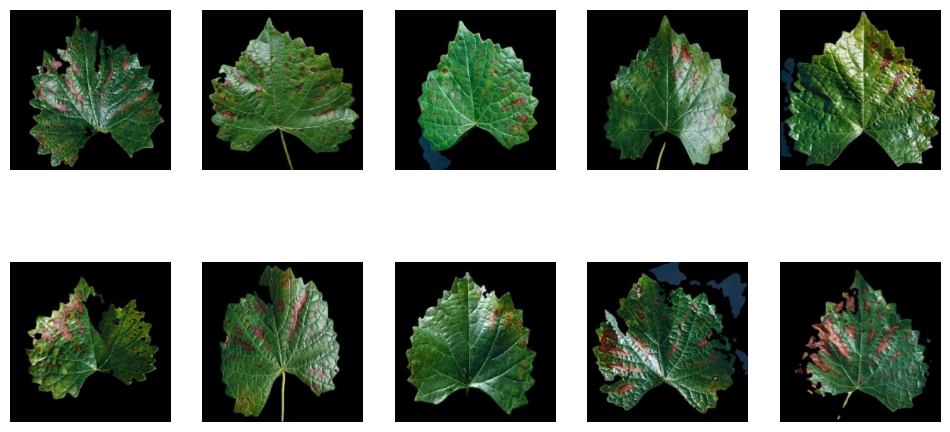

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load Iris data
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Split the Iris dataset
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

scaler_iris = preprocessing.StandardScaler().fit(X_iris_train)
X_iris_train_scaled = scaler_iris.transform(X_iris_train)
X_iris_test_scaled = scaler_iris.transform(X_iris_test)

# SVM classifier for the Idataset
svm_classifier_iris = SVC(kernel='linear', C=1.0)

# Train the classifier on the dataset
svm_classifier_iris.fit(X_iris_train_scaled, y_iris_train)

# predictions on the Iris test data
y_iris_pred = svm_classifier_iris.predict(X_iris_test_scaled)

# accuracy of the Iris model
accuracy_iris = accuracy_score(y_iris_test, y_iris_pred)
print("Iris Dataset:")
print(f"Accuracy: {accuracy_iris * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_iris_test, y_iris_pred))

# dataset path
train_dataset_path = "/content/drive/MyDrive/dataset/train"

# load images
def load_images_from_folder(folder):
    images = []
    paths = []
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if os.path.isfile(img_path):
                    try:
                        img = Image.open(img_path).convert('RGB')
                        images.append(img)
                        paths.append(img_path)
                    except Exception as e:
                        print(f"Error processing image: {img_path}\n{e}")
    return images, paths

# Load images from the training dataset folder
loaded_images, image_paths = load_images_from_folder(train_dataset_path)

num_images_to_display = 10
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(loaded_images[i])
    plt.axis("off")

plt.show()
